<a href="https://colab.research.google.com/github/santiagom26c/Taller1FA/blob/main/Codigo%20Taller1FA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
#Se importan las librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve,auc
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import matplotlib.pyplot as ptl
import seaborn as sns


In [172]:
# Leer los datos desde un archivo CSV
datos = pd.read_csv("credit_risk_dataset.csv",  sep=",", decimal=".")
datos.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','Y','x9','x10','x11']

In [173]:
#Vista general de los datos cargados
datos.head()

,x1,x2,x3,x4,x5,x6,x7,x8,Y,x9,x10,x11
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [174]:
#Dimensiones de los datos
datos.shape

(32581, 12)

In [175]:
#Tipo de datos
datos.dtypes

x1       int64
x2       int64
x3      object
x4     float64
x5      object
x6      object
x7       int64
x8     float64
Y        int64
x9     float64
x10     object
x11      int64
dtype: object

In [176]:
# Codificación de etiquetas para x6
"""La equivalencia de las variables queda de la siguiente manera:
A -> 0
B -> 1
C -> 2
D -> 3
E -> 4
F -> 5
G -> 6

"""
le = LabelEncoder()
datos['x6'] = le.fit_transform(datos['x6'])

In [177]:
# Codificación One-Hot para x3, x5 y x10
datos = pd.get_dummies(datos, columns=['x3'], prefix='x3')
datos = pd.get_dummies(datos, columns=['x5'], prefix='x5')
datos = pd.get_dummies(datos, columns=['x10'], prefix='x10')

In [178]:
datos.head(10)

,x1,x2,x4,x6,x7,x8,Y,x9,x11,x3_MORTGAGE,...,x3_OWN,x3_RENT,x5_DEBTCONSOLIDATION,x5_EDUCATION,x5_HOMEIMPROVEMENT,x5_MEDICAL,x5_PERSONAL,x5_VENTURE,x10_N,x10_Y
0,22,59000,123.00,3,35000,16.02,1,0.59,3,0,...,0,1,0,0,0,0,1,0,0,1
1,21,9600,5.00,1,1000,11.14,0,0.10,2,0,...,1,0,0,1,0,0,0,0,1,0
2,25,9600,1.00,2,5500,12.87,1,0.57,3,1,...,0,0,0,0,0,1,0,0,1,0
3,23,65500,4.00,2,35000,15.23,1,0.53,2,0,...,0,1,0,0,0,1,0,0,1,0
4,24,54400,8.00,2,35000,14.27,1,0.55,4,0,...,0,1,0,0,0,1,0,0,0,1
5,21,9900,2.00,0,2500,7.14,1,0.25,2,0,...,1,0,0,0,0,0,0,1,1,0
6,26,77100,8.00,1,35000,12.42,1,0.45,3,0,...,0,1,0,1,0,0,0,0,1,0
7,24,78956,5.00,1,35000,11.11,1,0.44,4,0,...,0,1,0,0,0,1,0,0,1,0
8,24,83000,8.00,0,35000,8.90,1,0.42,2,0,...,0,1,0,0,0,0,1,0,1,0
9,21,10000,6.00,3,1600,14.74,1,0.16,3,0,...,1,0,0,0,0,0,0,1,1,0


In [179]:
#Tipo de datos despues de codificacion
datos.dtypes

x1                        int64
x2                        int64
x4                      float64
x6                        int64
x7                        int64
x8                      float64
Y                         int64
x9                      float64
x11                       int64
x3_MORTGAGE               uint8
x3_OTHER                  uint8
x3_OWN                    uint8
x3_RENT                   uint8
x5_DEBTCONSOLIDATION      uint8
x5_EDUCATION              uint8
x5_HOMEIMPROVEMENT        uint8
x5_MEDICAL                uint8
x5_PERSONAL               uint8
x5_VENTURE                uint8
x10_N                     uint8
x10_Y                     uint8
dtype: object

In [180]:
#Se hace una descripcion de cada una de las variables
#Se dividen por grupos para una mejor visualizacion
grupo1 = datos[['x1', 'x2', 'x4','x7']]
grupo2 = datos[['x8','x9','x11']]
pd.set_option('display.width',100)
pd.set_option('display.precision',3)
pd.set_option('display.float_format', '{:.2f}'.format)
grupo1.describe()

,x1,x2,x4,x7
count,32581.00,32581.00,31686.00,32581.00
mean,27.73,66074.85,4.79,9589.37
std,6.35,61983.12,4.14,6322.09
min,20.00,4000.00,0.00,500.00
25%,23.00,38500.00,2.00,5000.00
50%,26.00,55000.00,4.00,8000.00
75%,30.00,79200.00,7.00,12200.00
max,144.00,6000000.00,123.00,35000.00


In [181]:
grupo2.describe()

,x8,x9,x11
count,29465.00,32581.00,32581.00
mean,11.01,0.17,5.80
std,3.24,0.11,4.06
min,5.42,0.00,2.00
25%,7.90,0.09,3.00
50%,10.99,0.15,4.00
75%,13.47,0.23,8.00
max,23.22,0.83,30.00


In [182]:
#Imputación de valores nulos en x4 (se reemplaza por la media)
datos['x4'].isna()
datos['x4'].fillna(4.79,inplace = True)

In [183]:
#Imputación de valores nulos en x8 (se reemplaza por la media)
datos['x8'].isna()
datos['x8'].fillna(11.01,inplace = True)

In [184]:
datos.describe()

,x1,x2,x4,x6,x7,x8,Y,x9,x11,x3_MORTGAGE,...,x3_OWN,x3_RENT,x5_DEBTCONSOLIDATION,x5_EDUCATION,x5_HOMEIMPROVEMENT,x5_MEDICAL,x5_PERSONAL,x5_VENTURE,x10_N,x10_Y
count,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,...,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,1.22,9589.37,11.01,0.22,0.17,5.80,0.41,...,0.08,0.50,0.16,0.20,0.11,0.19,0.17,0.18,0.82,0.18
std,6.35,61983.12,4.09,1.17,6322.09,3.08,0.41,0.11,4.06,0.49,...,0.27,0.50,0.37,0.40,0.31,0.39,0.38,0.38,0.38,0.38
min,20.00,4000.00,0.00,0.00,500.00,5.42,0.00,0.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,38500.00,2.00,0.00,5000.00,8.49,0.00,0.09,3.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,26.00,55000.00,4.00,1.00,8000.00,11.01,0.00,0.15,4.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,30.00,79200.00,7.00,2.00,12200.00,13.11,0.00,0.23,8.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,144.00,6000000.00,123.00,6.00,35000.00,23.22,1.00,0.83,30.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [185]:
#cantidad de salidas por clase en Y
datos.groupby('Y').size()

Y
0    25473
1     7108
dtype: int64

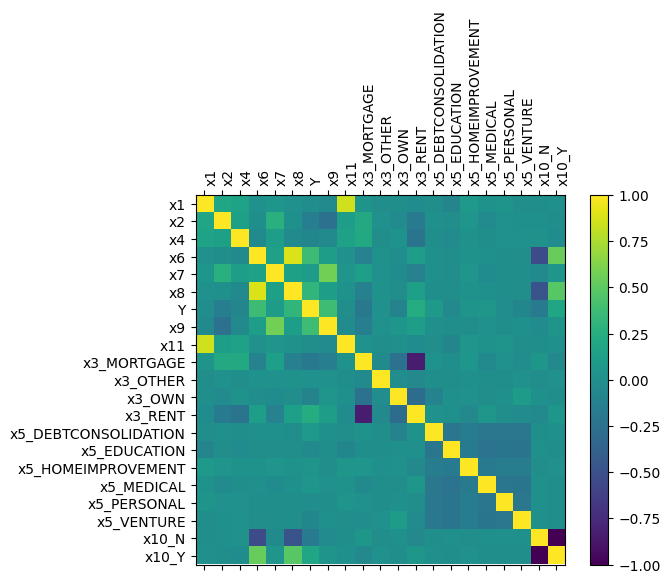

In [186]:
#Correlacion
correlation = datos.corr(method='pearson')
fig = ptl.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin = -1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,21,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(datos.columns, rotation=90, ha='left')
ax.set_yticklabels(datos.columns)
ptl.show()

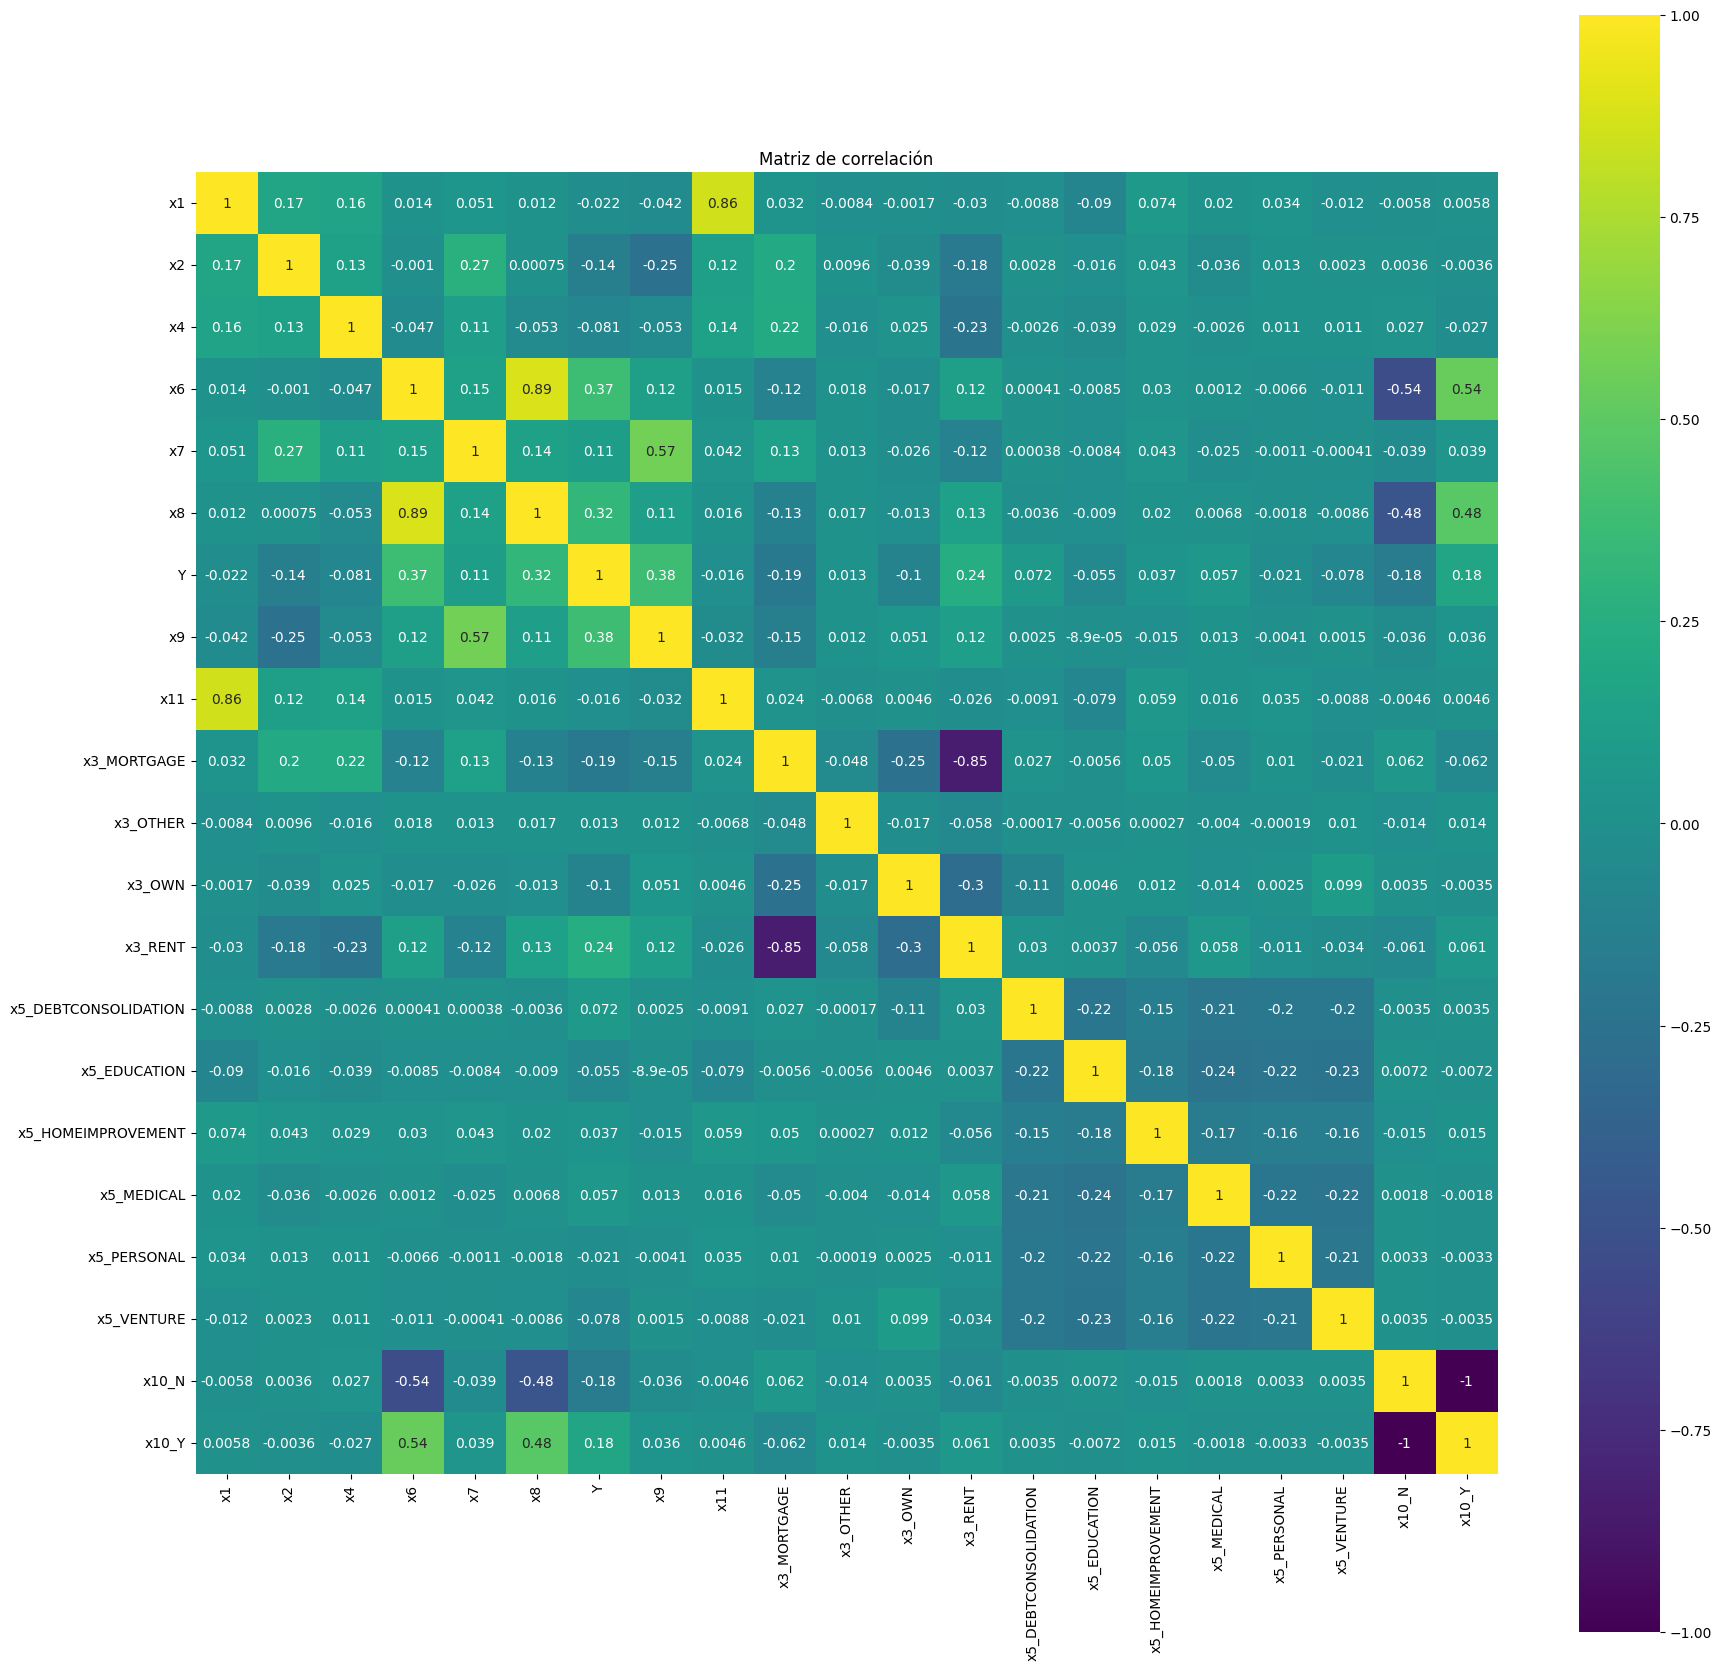

In [187]:
from pandas.io.formats.style import plt
correlation = datos.corr()
plt.figure(figsize = (21,21))
ax = sns.heatmap(correlation, vmax=1,square=True,annot =True,cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

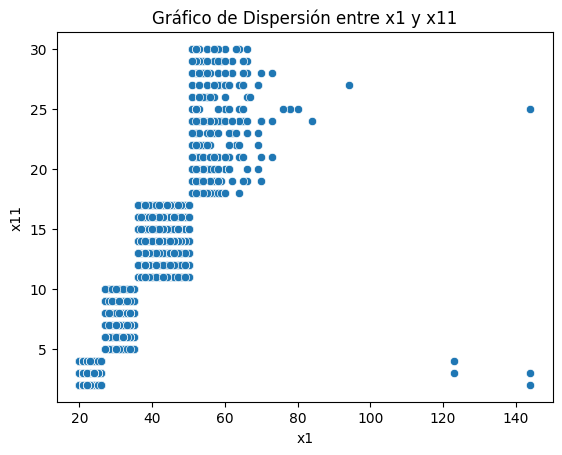

In [188]:
#Grafica de dispersion entre x1 y x11
sns.scatterplot(data=datos, x='x1', y='x11')
plt.title('Gráfico de Dispersión entre x1 y x11')
plt.show()

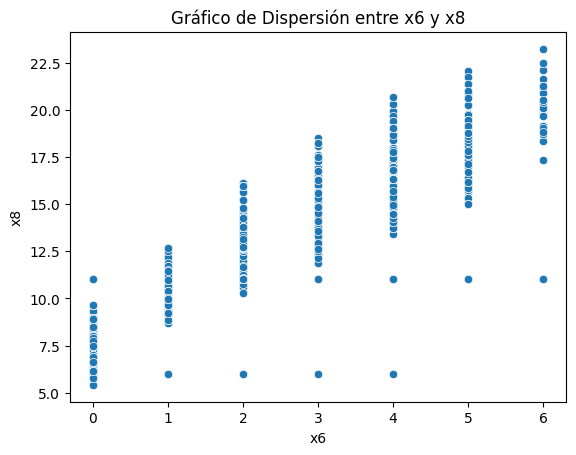

In [189]:
#Grafica de dispersion entre x1 y x11
sns.scatterplot(data=datos, x='x6', y='x8')
plt.title('Gráfico de Dispersión entre x6 y x8')
plt.show()

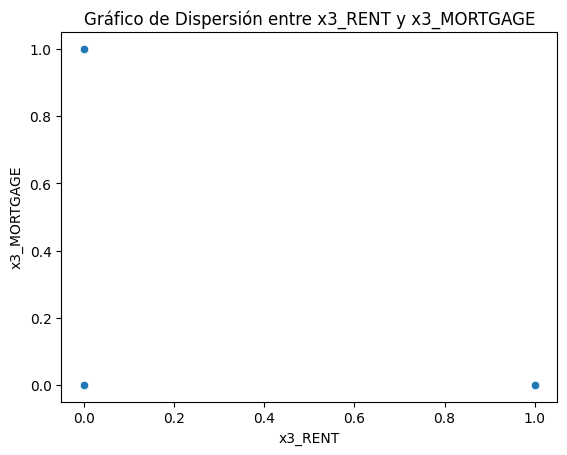

In [190]:
#Grafica de dispersion entre x1 y x11
sns.scatterplot(data=datos, x='x3_RENT', y='x3_MORTGAGE')
plt.title('Gráfico de Dispersión entre x3_RENT y x3_MORTGAGE')
plt.show()

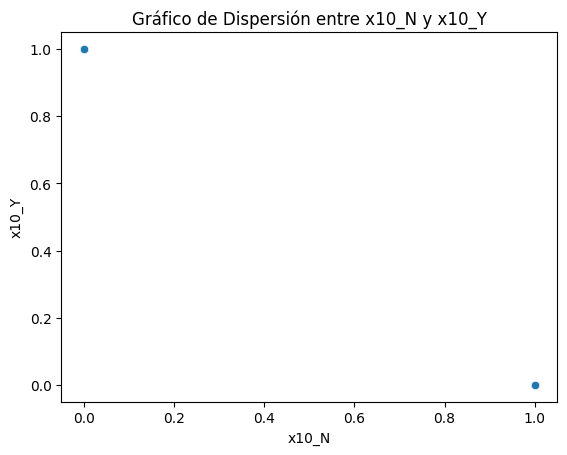

In [191]:
#Grafica de dispersion entre x1 y x11
sns.scatterplot(data=datos, x='x10_N', y='x10_Y')
plt.title('Gráfico de Dispersión entre x10_N y x10_Y')
plt.show()

In [192]:
#Se eliminan las columnas x11, x8, x3MORTGAGE y x10N
datos = datos.drop(['x11', 'x8', 'x3_MORTGAGE','x10_N'], axis=1)

Text(0, 0.5, 'Cantidad')

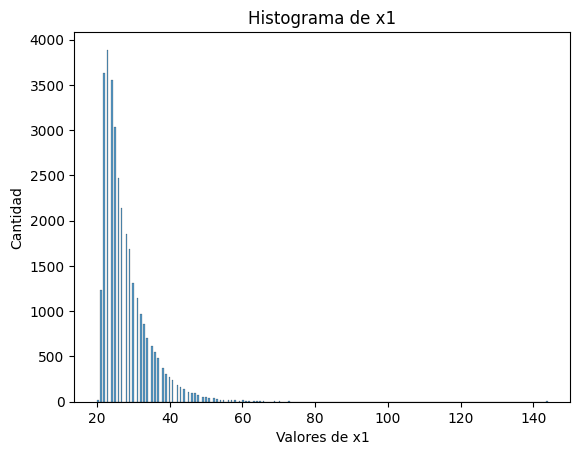

In [193]:
#Histograma de x1
sns.histplot(datos['x1'])
plt.title('Histograma de x1')
plt.xlabel('Valores de x1')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Valores de x1')

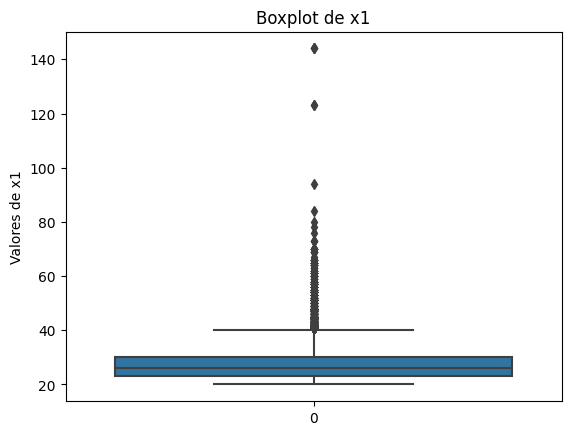

In [194]:
#Boxplot de x1
sns.boxplot(datos['x1'])
plt.title('Boxplot de x1')
plt.ylabel('Valores de x1')

In [195]:
#Se eliminan muestras con una edad > 75 años
datos = datos.drop(datos[datos['x1']>75].index)

Text(0, 0.5, 'Cantidad')

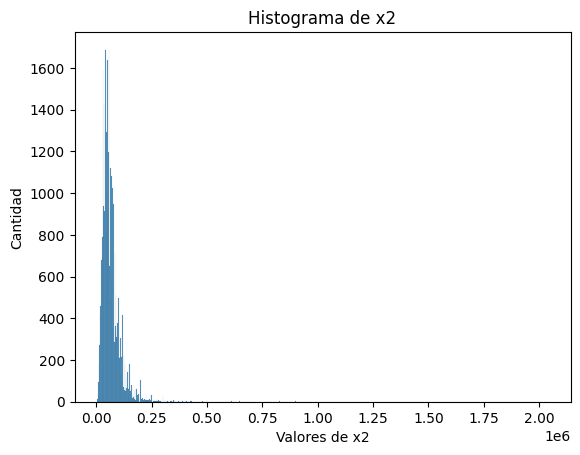

In [196]:
#Histograma de x2
sns.histplot(datos['x2'])
plt.title('Histograma de x2')
plt.xlabel('Valores de x2')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Valores de x2')

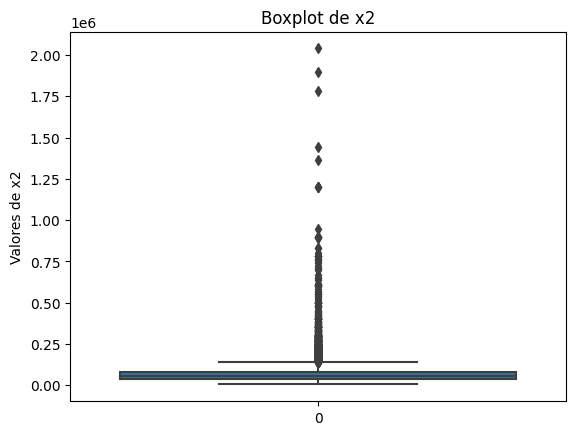

In [197]:
#Boxplot de x2
sns.boxplot(datos['x2'])
plt.title('Boxplot de x2')
plt.ylabel('Valores de x2')


In [198]:
#Cantidad de x2>600000
datos[datos['x2']>600000].shape

#Se eliminan muestras con una ingresos anuales > 600000
datos = datos.drop(datos[datos['x2']>600000].index)


In [199]:
#Datos corruptos en x4
datos[datos['x4']> datos['x1']-15]

#Se eliminan estas dos muestras corruptas
datos = datos.drop(datos[datos['x4'] > datos['x1']-15].index)

In [200]:
datos


,x1,x2,x4,x6,x7,Y,x9,x3_OTHER,x3_OWN,x3_RENT,x5_DEBTCONSOLIDATION,x5_EDUCATION,x5_HOMEIMPROVEMENT,x5_MEDICAL,x5_PERSONAL,x5_VENTURE,x10_Y
1,21,9600,5.00,1,1000,0,0.10,0,1,0,0,1,0,0,0,0,0
2,25,9600,1.00,2,5500,1,0.57,0,0,0,0,0,0,1,0,0,0
3,23,65500,4.00,2,35000,1,0.53,0,0,1,0,0,0,1,0,0,0
4,24,54400,8.00,2,35000,1,0.55,0,0,1,0,0,0,1,0,0,1
5,21,9900,2.00,0,2500,1,0.25,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.00,2,5800,0,0.11,0,0,0,0,0,0,0,1,0,0
32577,54,120000,4.00,0,17625,0,0.15,0,0,0,0,0,0,0,1,0,0
32578,65,76000,3.00,1,35000,1,0.46,0,0,1,0,0,1,0,0,0,0
32579,56,150000,5.00,1,15000,0,0.10,0,0,0,0,0,0,0,1,0,0


Text(0, 0.5, 'Cantidad')

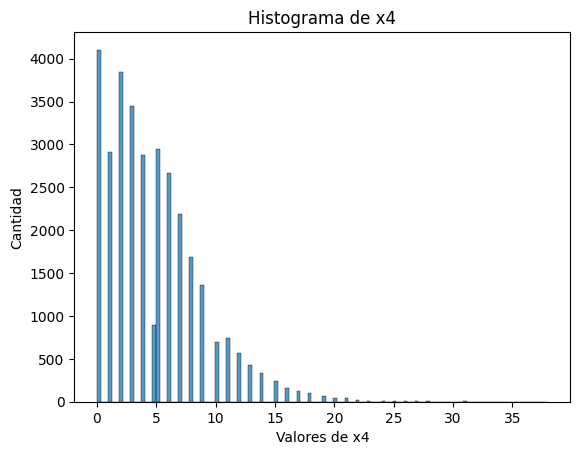

In [201]:
#Histograma de x4
sns.histplot(datos['x4'])
plt.title('Histograma de x4')
plt.xlabel('Valores de x4')
plt.ylabel('Cantidad')

In [202]:
#Cantidad de muestras donde x4>25
datos[datos['x4']>25].shape

#Se eliminan muestras con una antiguedad en empresa > 25 años
datos = datos.drop(datos[datos['x4']>25].index)

In [203]:
datos


,x1,x2,x4,x6,x7,Y,x9,x3_OTHER,x3_OWN,x3_RENT,x5_DEBTCONSOLIDATION,x5_EDUCATION,x5_HOMEIMPROVEMENT,x5_MEDICAL,x5_PERSONAL,x5_VENTURE,x10_Y
1,21,9600,5.00,1,1000,0,0.10,0,1,0,0,1,0,0,0,0,0
2,25,9600,1.00,2,5500,1,0.57,0,0,0,0,0,0,1,0,0,0
3,23,65500,4.00,2,35000,1,0.53,0,0,1,0,0,0,1,0,0,0
4,24,54400,8.00,2,35000,1,0.55,0,0,1,0,0,0,1,0,0,1
5,21,9900,2.00,0,2500,1,0.25,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.00,2,5800,0,0.11,0,0,0,0,0,0,0,1,0,0
32577,54,120000,4.00,0,17625,0,0.15,0,0,0,0,0,0,0,1,0,0
32578,65,76000,3.00,1,35000,1,0.46,0,0,1,0,0,1,0,0,0,0
32579,56,150000,5.00,1,15000,0,0.10,0,0,0,0,0,0,0,1,0,0


Text(0, 0.5, 'Cantidad')

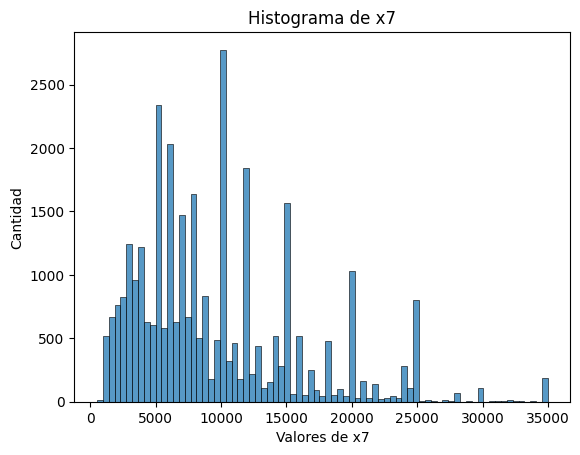

In [204]:
#Histograma de x7
sns.histplot(datos['x7'])
plt.title('Histograma de x7')
plt.xlabel('Valores de x7')
plt.ylabel('Cantidad')

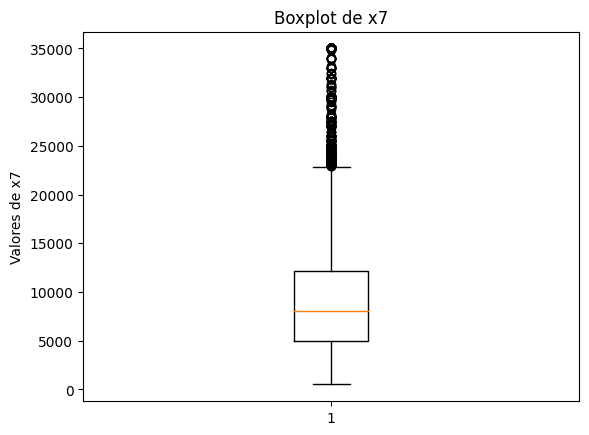

In [205]:
#Boxplot de x7
plt.boxplot(datos['x7'])
plt.title('Boxplot de x7')
plt.ylabel('Valores de x7')
plt.show()

In [207]:
#Se eliminan las columnas x9
datos = datos.drop(['x9'], axis=1)

KeyError: ignored

In [208]:
datos

,x1,x2,x4,x6,x7,Y,x3_OTHER,x3_OWN,x3_RENT,x5_DEBTCONSOLIDATION,x5_EDUCATION,x5_HOMEIMPROVEMENT,x5_MEDICAL,x5_PERSONAL,x5_VENTURE,x10_Y
1,21,9600,5.00,1,1000,0,0,1,0,0,1,0,0,0,0,0
2,25,9600,1.00,2,5500,1,0,0,0,0,0,0,1,0,0,0
3,23,65500,4.00,2,35000,1,0,0,1,0,0,0,1,0,0,0
4,24,54400,8.00,2,35000,1,0,0,1,0,0,0,1,0,0,1
5,21,9900,2.00,0,2500,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.00,2,5800,0,0,0,0,0,0,0,0,1,0,0
32577,54,120000,4.00,0,17625,0,0,0,0,0,0,0,0,1,0,0
32578,65,76000,3.00,1,35000,1,0,0,1,0,0,1,0,0,0,0
32579,56,150000,5.00,1,15000,0,0,0,0,0,0,0,0,1,0,0


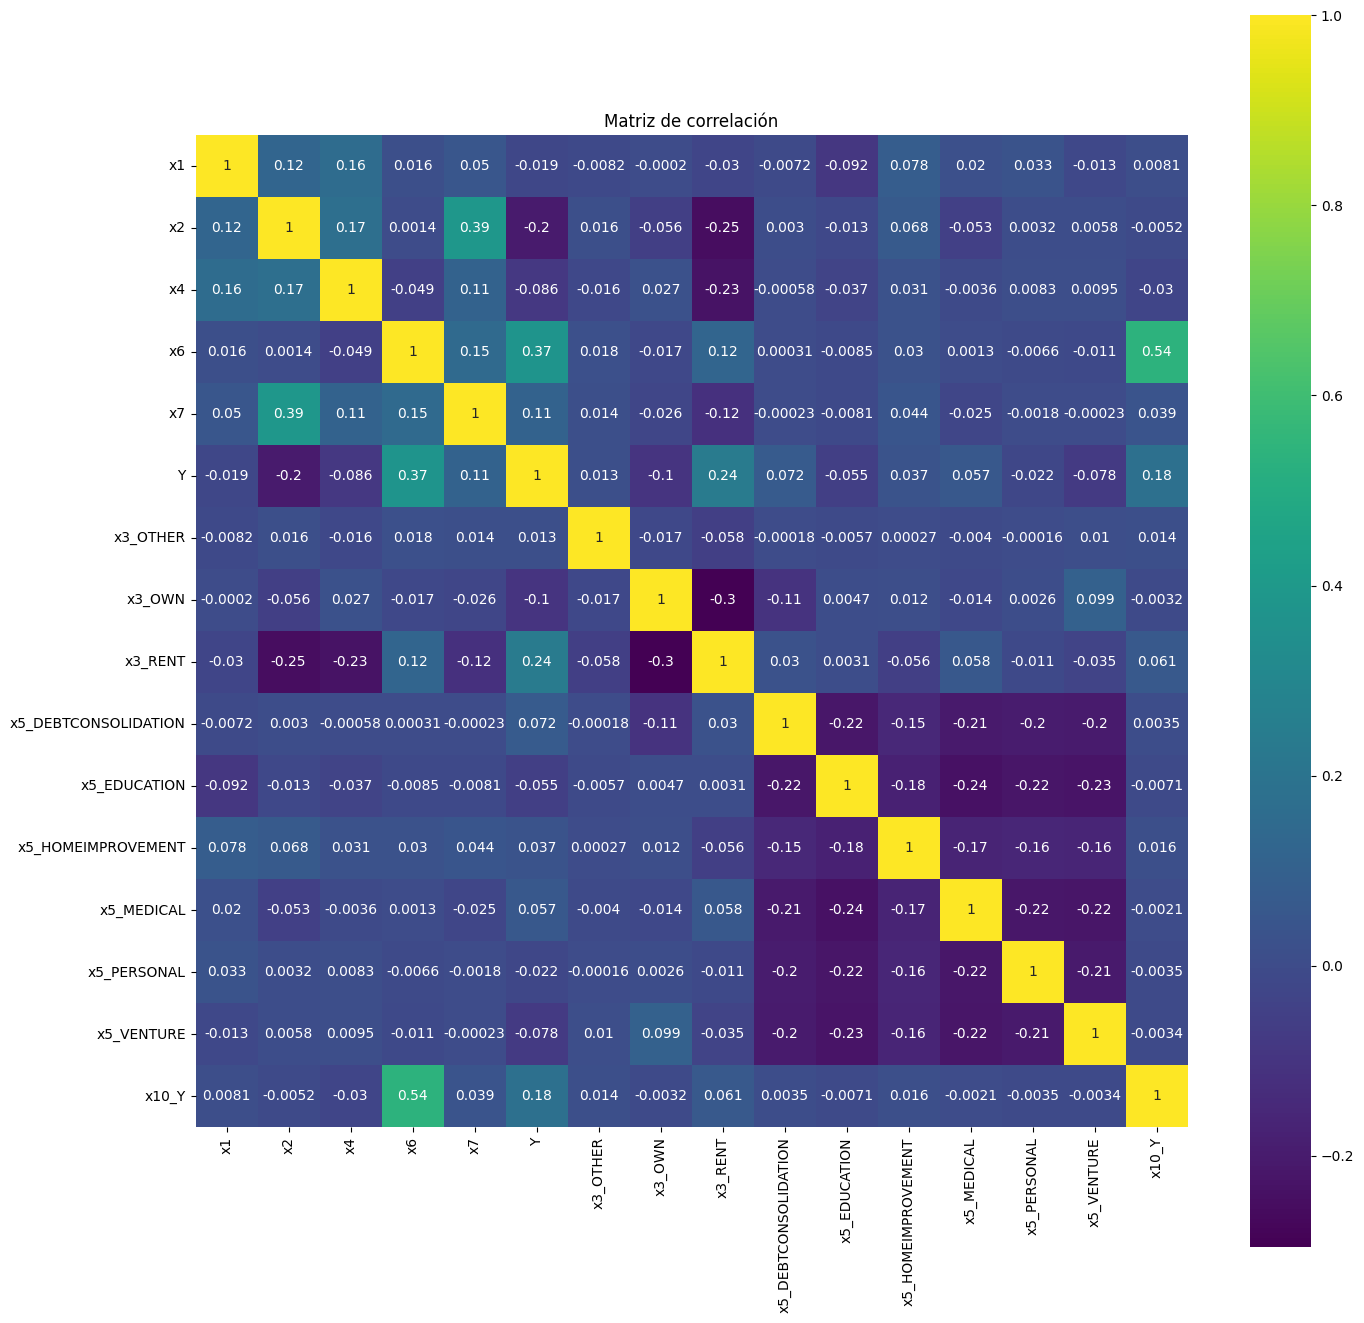

In [209]:
#Matriz de correlación donde se ve que las variables independientes no estan correlacionadas
from pandas.io.formats.style import plt
correlation = datos.corr()
plt.figure(figsize = (16,16))
ax = sns.heatmap(correlation, vmax=1,square=True,annot =True,cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

In [210]:
datos.describe()

,x1,x2,x4,x6,x7,Y,x3_OTHER,x3_OWN,x3_RENT,x5_DEBTCONSOLIDATION,x5_EDUCATION,x5_HOMEIMPROVEMENT,x5_MEDICAL,x5_PERSONAL,x5_VENTURE,x10_Y
count,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00,32508.00
mean,27.68,64858.07,4.76,1.22,9581.84,0.22,0.00,0.08,0.51,0.16,0.20,0.11,0.19,0.17,0.18,0.18
std,6.12,42066.64,3.92,1.17,6315.13,0.41,0.06,0.27,0.50,0.37,0.40,0.31,0.39,0.37,0.38,0.38
min,20.00,4000.00,0.00,0.00,500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,38464.25,2.00,0.00,5000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,26.00,55000.00,4.00,1.00,8000.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,30.00,79000.00,7.00,2.00,12150.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,73.00,600000.00,25.00,6.00,35000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [211]:
#Modelo knn
#Se divide la base de datos en datos para entrenamiento (75%) y datos para validación (25%)
np.random.seed(20)
prop_train = 0.75
datos_train , datos_val = train_test_split(datos,train_size=prop_train,random_state=20)

In [212]:
datos_train.shape

(24381, 16)

In [213]:
datos_val.shape


(8127, 16)

In [214]:
#Se separa variable objetivo Y de bases de datos de entrenamiento y datos de validación
Y_train = datos_train['Y']
Y_val = datos_val['Y']

#Se hace lo mismo con las demas variables
X_train = datos_train.drop(columns = ['Y'])
X_val = datos_val.drop(columns = ['Y'])

In [215]:
#Estandarización de los datos
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_val_standard = scaler.fit_transform(X_val)

In [216]:

#Con el fin de determinar la mejor k para el modelo se evaluan las siguientes k y se selecciona la de mejores resultados

k_values = [1, 3, 4, 5, 7, 9, 11,15]

# Diccionario para almacenar los resultados de cada valor de k
results = {}

for k in k_values:
    modelo_knn = KNeighborsClassifier(n_neighbors=k)
    modelo_knn.fit(X_train_standard, Y_train)

    # Realizar predicciones en el conjunto de validación
    Y_val_pred = modelo_knn.predict(X_val_standard)

    # Calcular el F1-score para evaluar el modelo
    f1 = metrics.f1_score(Y_val, Y_val_pred)

    # Almacenar el resultado en el diccionario de resultados
    results[k] = f1

# Encontrar el valor de k que tiene el mejor F1-score
best_k = max(results, key=results.get)
best_f1 = results[best_k]

print("Resultados F1-score para diferentes valores de k:")
for k, f1 in results.items():
    print(f"k = {k}: F1-score = {f1}")

print(f"El mejor valor de k es {best_k} con un F1-score de {best_f1}")

Resultados F1-score para diferentes valores de k:
k = 1: F1-score = 0.6362586605080832
k = 3: F1-score = 0.6560306317804723
k = 4: F1-score = 0.6212612612612612
k = 5: F1-score = 0.6588471849865952
k = 7: F1-score = 0.6522929500342232
k = 9: F1-score = 0.6482903000697837
k = 11: F1-score = 0.6442715700141444
k = 15: F1-score = 0.6382363570654137
El mejor valor de k es 5 con un F1-score de 0.6588471849865952


In [217]:
#Modelo de clasificacion KNN con k=5
k = 5
modelo_knn  = KNeighborsClassifier(n_neighbors=k)
modelo_knn.fit(X_train_standard,Y_train)

KNeighborsClassifier()

In [218]:
#Predicciones con conjunto de validación
Y_val_pred = modelo_knn.predict(X_val_standard)

In [219]:
Y_val_pred

array([0, 0, 0, ..., 0, 0, 0])

In [220]:
#Metricas de desempeño para el modelo
#Matriz de confusion
mat_confusion = metrics.confusion_matrix(Y_val,Y_val_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = mat_confusion,display_labels = modelo_knn.classes_)

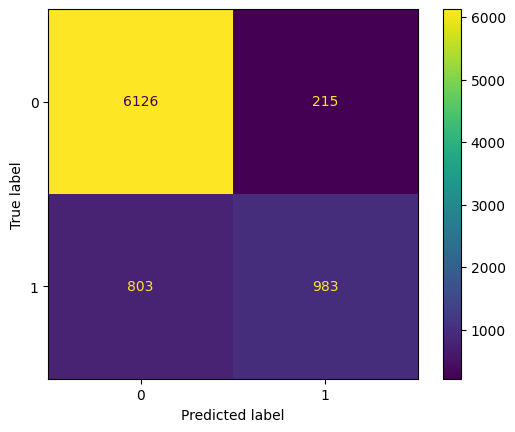

In [221]:
disp.plot()

In [222]:
# Creacion de variables para true negative, false positive, false negative y true positive
tn, fp, fn, tp = mat_confusion.ravel()

In [223]:
#Accuracy
accuaracy = metrics.accuracy_score(Y_val,Y_val_pred)
accuaracy

0.8747385259013166

In [224]:
precision = metrics.precision_score(Y_val,Y_val_pred)
precision

0.820534223706177

In [225]:
#Calculo del recall
recall = metrics.recall_score(Y_val,Y_val_pred)
recall

0.5503919372900336

In [226]:
#Calculo del f1_score
f1_score = metrics.f1_score(Y_val,Y_val_pred)
f1_score

0.6588471849865952

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Text(0.5, 0, 'False positive rate')

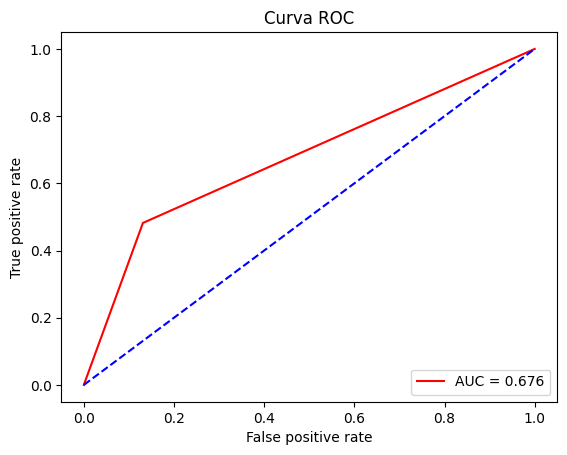

In [227]:
#Curva roc
frp,trp, threshold = roc_curve(Y_val,modelo_knn.predict_proba(X_val)[:,1])
roc_auc_ = auc(frp,trp)
plt.title('Curva ROC')
plt.plot(frp,trp,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [268]:
#Scorecard

# Conjunto de datos diferente al de la base de datos para calcular su scorecard
datos_prueba_scorecard = [
    [25, 10000, 3.00, 2, 1000, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [35, 180000, 8.00, 1, 6000, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [20, 65500, 3.00, 3, 40000, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [24, 56600, 6.00, 2, 4000, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
]

# Nombres de las columnas
columnas = ['x1', 'x2', 'x4', 'x6', 'x7', 'x3_OTHER', 'x3_OWN', 'x3_RENT',
            'x5_DEBTCONSOLIDATION', 'x5_EDUCATION', 'x5_HOMEIMPROVEMENT',
            'x5_MEDICAL', 'x5_PERSONAL', 'x5_VENTURE', 'x10_Y']

# Crear un DataFrame de pandas con nuevos datos
datos_prueba_df = pd.DataFrame(datos_prueba_scorecard, columns=columnas)

In [261]:
datos_prueba_df

,x1,x2,x4,x6,x7,x3_OTHER,x3_OWN,x3_RENT,x5_DEBTCONSOLIDATION,x5_EDUCATION,x5_HOMEIMPROVEMENT,x5_MEDICAL,x5_PERSONAL,x5_VENTURE,x10_Y
0,25,10000,3.00,2,1000,0,1,0,0,1,0,0,0,0,0
1,35,180000,8.00,1,6000,0,0,0,0,0,0,0,1,0,0
2,20,65500,3.00,3,40000,0,0,1,0,0,0,0,1,0,0
3,24,56600,6.00,2,4000,0,0,1,0,0,0,0,1,0,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(datos_prueba_df, *['x1'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(datos_prueba_df, *['x2'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(datos_prueba_df, *['x4'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(datos_prueba_df, *['x6'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(datos_prueba_df, *['x1'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(datos_prueba_df, *['x2'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(datos_prueba_df, *['x4'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(datos_prueba_df, *['x6'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(datos_prueba_df, *[[['x1', 'x2'], ['x2', 'x4'], ['x4', 'x6'], ['x6', 'x7']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(datos_prueba_df, *['x3_OTHER', 'x1', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(datos_prueba_df, *['x3_OTHER', 'x2', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(datos_prueba_df, *['x3_OTHER', 'x4', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(datos_prueba_df, *['x3_OTHER', 'x6', None], **{})
chart

In [275]:

# Estandarizar los datos de prueba utilizando el mismo scaler ajustado a los datos de entrenamiento
datos_prueba_standard = scaler.transform(X_standard)

# Calcular puntajes (probabilidades de que y =0) para los nuevos datos utilizando el modelo KNN
probabilidades = modelo_knn.predict_proba(datos_prueba_standard)[:, 0]

# Mapear las probabilidades al rango deseado (para el scorecard de 300 a 850)
rango_min = 300
rango_max = 850

# Utilizar una función de mapeo para asignar puntajes basados en probabilidades
def mapear_a_puntaje(probabilidad, rango_min, rango_max):
    return rango_min + (rango_max - rango_min) * probabilidad

# Aplicar la función de mapeo a las probabilidades
puntajes_convertidos = [mapear_a_puntaje(probabilidad, rango_min, rango_max) for probabilidad in probabilidades]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [282]:
for indice, probabilidad in enumerate(probabilidades):
    print(f"Probabilidad de que la persona {indice+1} cumpla con su obligación crediticia: {probabilidad*100}%")


Probabilidad de que la persona 1 cumpla con su obligación crediticia: 80.0%
Probabilidad de que la persona 2 cumpla con su obligación crediticia: 60.0%
Probabilidad de que la persona 3 cumpla con su obligación crediticia: 20.0%
Probabilidad de que la persona 4 cumpla con su obligación crediticia: 80.0%


In [284]:
puntajes_convertidos
for indice, puntaje in enumerate(puntajes_convertidos):
  print(f"Scorecard para persona {indice+1}: {puntaje}")

Scorecard para persona 1: 740.0
Scorecard para persona 2: 630.0
Scorecard para persona 3: 410.0
Scorecard para persona 4: 740.0
